## Q1) Random Forest Classifier: Perform Classification on IRIS DATASET and MNIST DATASET using Random Forest Classifier. 

# IRIS Dataset

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
print(iris.data[0:5])
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
import pandas as pd
df=pd.DataFrame({'sepal length':iris.data[:,0],'sepal width':iris.data[:,1],'petal length':iris.data[:,2],'petal width':iris.data[:,3],'species':iris.target})
df.head(10)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X=df[['sepal length', 'sepal width', 'petal length', 'petal width']]
Y=df['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,Y_train)

Y_pred=clf.predict(X_test)

In [13]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9333333333333333


In [14]:
species_idx = clf.predict([[3, 5, 4, 2]])[0]
iris.target_names[species_idx]

'virginica'

#### Finding Important Features

In [15]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.46850
petal length (cm)    0.41378
sepal length (cm)    0.07957
sepal width (cm)     0.03815
dtype: float64

No handles with labels found to put in legend.


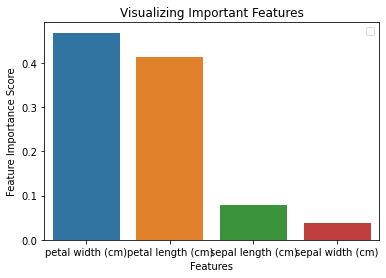

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp.index, y=feature_imp)

plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### Generating the Model on Selected Features (for more accurate results)

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf1=RandomForestClassifier(n_estimators=100)

clf1.fit(X_train,Y_train)

Y_pred=clf1.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9555555555555556
